In [24]:
#Imports

import numpy as np
import sympy as sp
from sympy import init_printing
from sympy import *
from sympy import Matrix, symbols, solve_linear_system
from sympy.interactive import printing
from sympy.printing.latex import LatexPrinter, print_latex
from sympy import Eq
printing.init_printing(use_latex=True)
import matplotlib.pyplot as plt

In [25]:
#Data

E=float(input("E=")) #GPa (40)
a=float(input("a=")) #mm (220)
b=float(input("b=")) #mm (540)
c=float(input("c=")) #mm (730)
d=float(input("d=")) #mm (27)
p_1=float(input("p_1=")) #N/m (-3000)
F_1=float(input("F_1=")) #kN (-1)
M=float(input("M_1=")) #kNm (-1.1)

#Change to SI

E=E*10**9
a=a/1000
b=b/1000
c=c/1000
d=d/1000
F_1=F_1*1000
M=M*1000

In [26]:
#Rudak hossza

print("A rudak hosszai:")

L_1=a
print("\nL_1=",L_1*1000,"[mm]")

L_2=b-a
print("L_2=",L_2*1000,"[mm]")

L_3=c-b
print("L_3=",L_3*1000,"[mm]")

#Rudak keresztmetszete

print("\nA rudak keresztmetszetei")

A_1=d**2*np.pi/4
print("\nA_1=",A_1,"[m^2]")

A_2=(2*d)**2*np.pi/4
print("A_2=",A_2,"[m^2]")

A_3=A_2
print("A_3=",A_3,"[m^2]")

print("\nA rudak másodrendű nyomatékai")

Iz_1=d**4*np.pi/64
print("\nIz_1=",Iz_1,"[m^4]")

Iz_2=(2*d)**4*np.pi/64
print("Iz_2=",Iz_2,"[m^4]")

Iz_3=Iz_2
print("Iz_3=",Iz_3,"[m^4]")

#Rudak rugalmassagi modulusai

E_1=4*E
E_2=E
E_3=E

A rudak hosszai:

L_1= 220.0 [mm]
L_2= 320.00000000000006 [mm]
L_3= 189.99999999999994 [mm]

A rudak keresztmetszetei

A_1= 0.0005725552611167398 [m^2]
A_2= 0.002290221044466959 [m^2]
A_3= 0.002290221044466959 [m^2]

A rudak másodrendű nyomatékai

Iz_1= 2.6087049084631455e-08 [m^4]
Iz_2= 4.173927853541033e-07 [m^4]
Iz_3= 4.173927853541033e-07 [m^4]


Merevségi mátrixok:

K_ 1 =


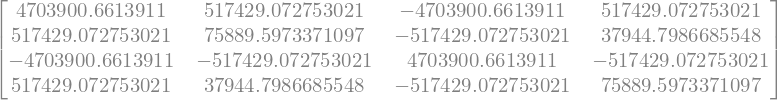


K_ 2 =


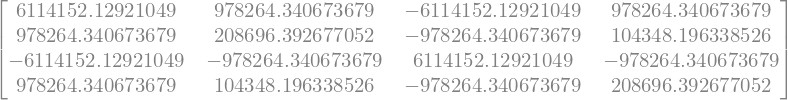


K_ 3 =


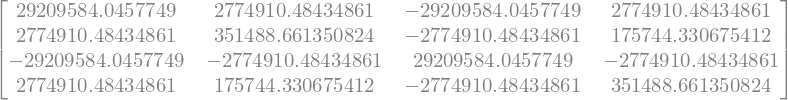

In [27]:
#Merevsegi matrixok meghatarozasa

print("Merevségi mátrixok:")

def K_matrix(Iz,Ei,L):
    K=Iz*Ei/(L**3)*sp.Matrix([[12,6*L,-12,6*L],
                              [6*L,4*L**2,-6*L,2*L**2],
                              [-12,-6*L,12,-6*L],
                              [6*L,2*L**2,-6*L,4*L**2]])
    return K

#Printing 

n=3
i=0
L_array=[L_1,L_2,L_3]
Iz_array=[Iz_1,Iz_2,Iz_3]
E_array=[E_1,E_2,E_3]
K_array=[0,0,0]
for i in range(n):
    K_array[i]=K_matrix(Iz_array[i],E_array[i],L_array[i])
    print("\nK_",i+1,"=")
    display(K_array[i])
    i=i+1

Globális merevségi mátrix:

K_glob=


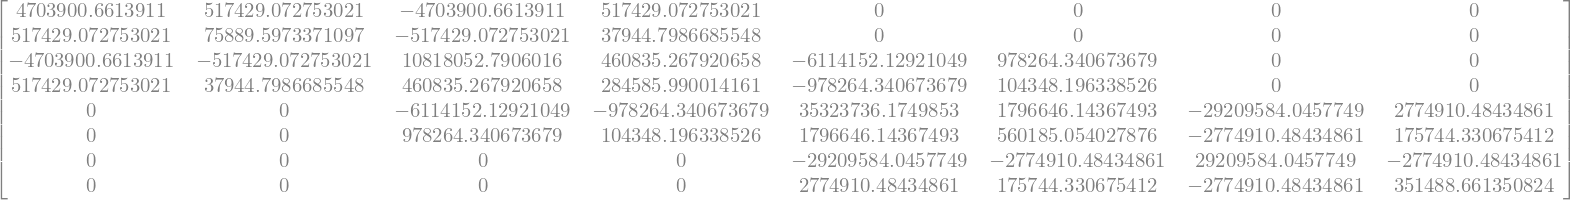

In [28]:
#Globalis merevsegi matrix

print("Globális merevségi mátrix:")

#Elem-csomopont osszerendeles

ecs = sp.Matrix([[1,2],[2,3],[3,4]])

eDOF1 = [2*ecs[0,0]-1, 2*ecs[0,0], 2*ecs[0,1]-1, 2*ecs[0,1]]
eDOF2 = [2*ecs[1,0]-1, 2*ecs[1,0], 2*ecs[1,1]-1, 2*ecs[1,1]]
eDOF3 = [2*ecs[2,0]-1, 2*ecs[2,0], 2*ecs[2,1]-1, 2*ecs[2,1]]

def ExtMatrix(mx, rows, size):
    n = len(rows)
    Mx = np.zeros((size,size))
    for i in range(n):
        for j in range(n):
            Mx[rows[i]-1,rows[j]-1] = mx[i,j]
    return Mx

K_glob = ExtMatrix(K_matrix(Iz_1,E_1,L_1), eDOF1, 8) + ExtMatrix(K_matrix(Iz_2,E_2,L_2), eDOF2, 8) + ExtMatrix(K_matrix(Iz_3,E_3,L_3), eDOF3, 8)

print("\nK_glob=")
display(sp.Matrix(K_glob))

Globális terhelésvektor:

F_glob=


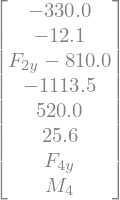


Globális elmozdulásvektor:

U_glob=


⎡v₁⎤
⎢  ⎥
⎢Θ₁⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢Θ₂⎥
⎢  ⎥
⎢v₃⎥
⎢  ⎥
⎢Θ₃⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎣0 ⎦

In [29]:
#Globalis terhelesvektor

print("Globális terhelésvektor:")

#Symbols

F1_y,M_1,F2_y,M_2,F3_y,M_3,F4_y,M_4=sp.symbols("F1_y,M_1,F2_y,M_2,F3_y,M_3,F4_y,M_4")

#PF:

F1_y=0
M_1=0
M_2=M
F3_y=-F_1 #?
M_3=0

F_r=sp.Matrix(([F1_y],[M_1],[F2_y],[M_2],[F3_y],[M_3],[F4_y],[M_4]))
F_p=sp.Matrix(([p_1*L_1/2],[p_1*L_1**2/12],[p_1*(L_1+L_2)/2],[p_1*(L_2**2-L_1**2)/12],[p_1*L_2/2],[-p_1*L_2**2/12],[0],[0]))

F=F_r+F_p

print("\nF_glob=")

display(F)

#Globalis elmozdulasvektor

print("\nGlobális elmozdulásvektor:")

v_1,v_2,v_3,v_4,Θ_1,Θ_2,Θ_3,Θ_4=sp.symbols("v_1,v_2,v_3,v_4,Θ_1,Θ_2,Θ_3,Θ_4")

#PF

v_2=0
v_4=0
Θ_4=0

U=sp.Matrix([[v_1],[Θ_1],[v_2],[Θ_2],[v_3],[Θ_3],[v_4],[Θ_4]])

print("\nU_glob=")

display(U)

A kondenzált merevségi mátrix:

K_kond=


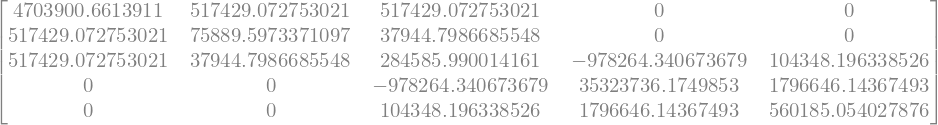


A kondenzált terhelés vektor:

F_kond=


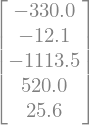


A kondenzált elmozdulás vektor:

U_kond=


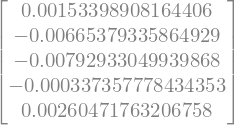


Az elmozdulás komponensek:

v_1= 1.53398908164406 [mm]
Θ_1= -0.00665379335864929 [rad]
Θ_2= -0.00792933049939868 [rad]
v_3= -0.337357778434353 [mm]
Θ_3= 0.00260471763206758 [rad]


In [30]:
#Egyenlet kondenzalas

#Kondenzalt merevsegi matrix

print("A kondenzált merevségi mátrix:")

def SubMatrix(Mx, rows):
    n = len(rows)
    mx = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            mx[i,j] = Mx[rows[i]-1,rows[j]-1]
    return sp.Matrix(mx)

freeDoF=sp.Matrix([[1,2,4,5,6]])

K_kond=SubMatrix(K_glob,freeDoF)

print("\nK_kond=")

display(K_kond)

#Kondenzalt terheles vektor

print("\nA kondenzált terhelés vektor:")

def SubVector(Mx, rows):
    n = len(rows)
    mx = np.zeros((n, 1))
    for i in range(n):
        mx[i, 0] = Mx[rows[i]-1, 0]
    return sp.Matrix(mx)

F_kond=SubVector(F,freeDoF)

print("\nF_kond=")

display(F_kond)

#Kondenzalas elmozdulas vektor

print("\nA kondenzált elmozdulás vektor:")

U_kond=sp.Matrix(np.matmul(sp.Inverse(K_kond),F_kond))

print("\nU_kond=")

display(U_kond)

#Elmozdulaskomponensek

print("\nAz elmozdulás komponensek:")

v_1=U_kond[0]
Θ_1=U_kond[1]
Θ_2=U_kond[2]
v_3=U_kond[3]
Θ_3=U_kond[4]

print("\nv_1=",v_1*1000,"[mm]")
print("Θ_1=",Θ_1,"[rad]")
print("Θ_2=",Θ_2,"[rad]")
print("v_3=",v_3*1000,"[mm]")
print("Θ_3=",Θ_3,"[rad]")

Globális elmozdulásvektor:

U_glob=


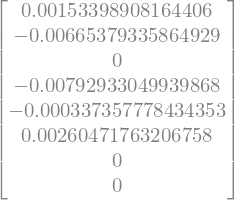


Globális terhelesvektor:

F_glob=


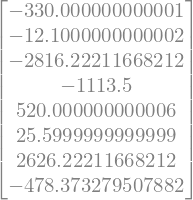


A terhelés komponensek:

F2_y= -2.00622211668212 [kN]
F3_y= 2.62622211668212 [kN]
M_3= -0.478373279507882 [kNm]


In [31]:
#Globalis elmozdulasvektor numerikusan

print("Globális elmozdulásvektor:")

U=sp.Matrix([[v_1],[Θ_1],[v_2],[Θ_2],[v_3],[Θ_3],[v_4],[Θ_4]])

print("\nU_glob=")

display(U)

#Globalis terhelesvektor

print("\nGlobális terhelesvektor:")

F=sp.Matrix(np.matmul(K_glob,U))

print("\nF_glob=")
display(F)

#Terheléskomponensek meghatározása

print("\nA terhelés komponensek:")

F2_y=F[2]-F_p[2]
print("\nF2_y=",F2_y/1000,"[kN]")

F3_y=F[6]
print("F4_y=",F3_y/1000,"[kN]")

M_3=F[7]
print("M_4=",M_3/1000,"[kNm]")

Lehajlásvüggvények alakjai:

v(x)_1= -0.0131770365779897*x**3 + 0.00144947402357889*x**2 - 0.00665379335864929*x + 0.00153398908164406
v(x)_2= -0.0314074878136366*x**3 + 0.0522639863129618*x**2 - 0.0263651172465618*x + 0.00360517578693585
v(x)_3= (0.00481183755014444 - 0.0262165340101861*x)*(x - 0.73)**2

A lehajlás függvény ábrázolva:


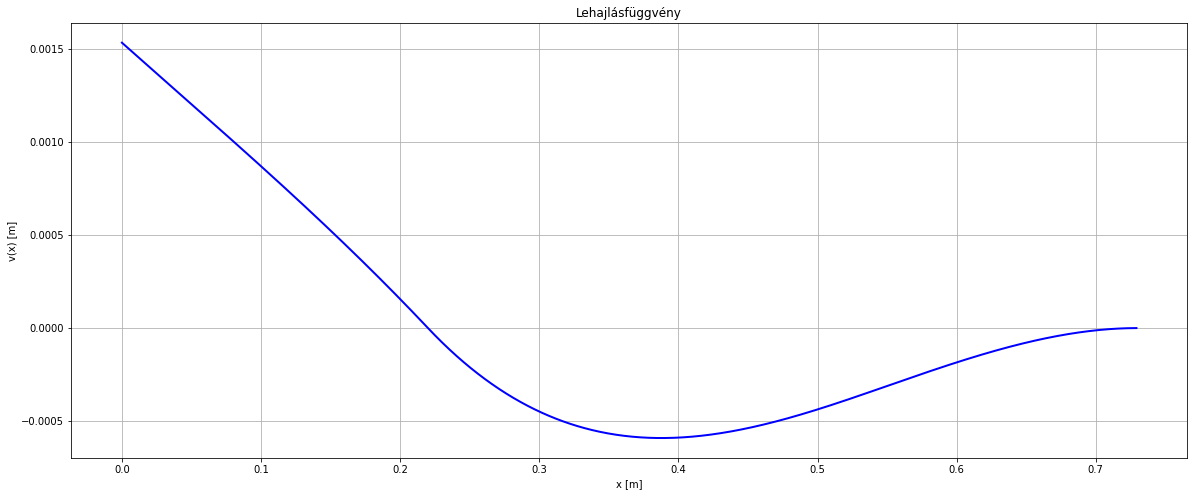

A lehajlásfüggvény értékei a nevezetes pontokban:

v(0)= 0.00153398908164406 [m]
v(a)= -1.30104260698261e-18 [m]
v(b)= -0.000337357778434348 [m]
v(c)= 0 [m]


In [58]:
#Lehajlasfuggveny meghatarazosa

print("Lehajlásvüggvények alakjai:")

x=sp.symbols("x")

def v_x(L_i,eDOF_i,x_i):
    #N_i=sp.Matrix([[1-3*(x/L_i)**2+2*(x/L_i)**3,x-2*x*(x/L_i)+x*(x/L_i)**2,3*(x/L_i)**2-2*(x/L_i)**3,-x*(x/L_i)+x*(x/L_i)**2]])
    ξ=2*(x-x_i)/L_i-1
    N_i=sp.Matrix([[1/4*(1-ξ)**2*(2+ξ),L_i/8*(1-ξ)**2*(1+ξ),1/4*(1+ξ)**2*(2-ξ),-L_i/8*(1+ξ)**2*(1-ξ)]])
    U_i=SubVector(U,eDOF_i)
    v_x_i=sp.Matrix(np.matmul(N_i,U_i))
    return v_x_i[0]
 
v_x_1=sp.simplify(v_x(L_1,eDOF1,0))
print("\nv(x)_1=",v_x_1)

v_x_2=sp.simplify(v_x(L_2,eDOF2,a))
print("v(x)_2=",v_x_2)

v_x_3=sp.simplify(v_x(L_3,eDOF3,b))
print("v(x)_3=",v_x_3)

#Plot

print("\nA lehajlás függvény ábrázolva:")

v_xg=sp.Piecewise((v_x_1, a>x),(v_x_2, b>x),(v_x_3, c>x))
xs=np.linspace(0.,float(c),1000)

v_xs=[v_xg.subs(x,xi) for xi in xs]

plt.figure(figsize=(20,8))
plt.plot(xs, v_xs, lw=2, color='blue')
plt.title("Lehajlásfüggvény")
plt.xlabel("x [m]")
plt.ylabel("v(x) [m]")
plt.grid()
plt.show()

print("A lehajlásfüggvény értékei a nevezetes pontokban:")

print("\nv(0)=",v_x_1.subs(x,0),"[m]")
print("v(a)=",v_x_1.subs(x,a),"[m]")
print("v(b)=",v_x_2.subs(x,b),"[m]")
print("v(c)=",v_x_3.subs(x,c),"[m]")

Szögelfordulás függvények alakjai:

φ(x)_1= -0.0395311097339692*x**2 + 0.00289894804715779*x - 0.00665379335864929
φ(x)_2= -0.0942224634409099*x**2 + 0.104527972625924*x - 0.0263651172465618
φ(x)_3= -0.0786496020305583*x**2 + 0.0861759544100323*x - 0.0209960737972391

A szögelfordulás függvény ábrázolva:


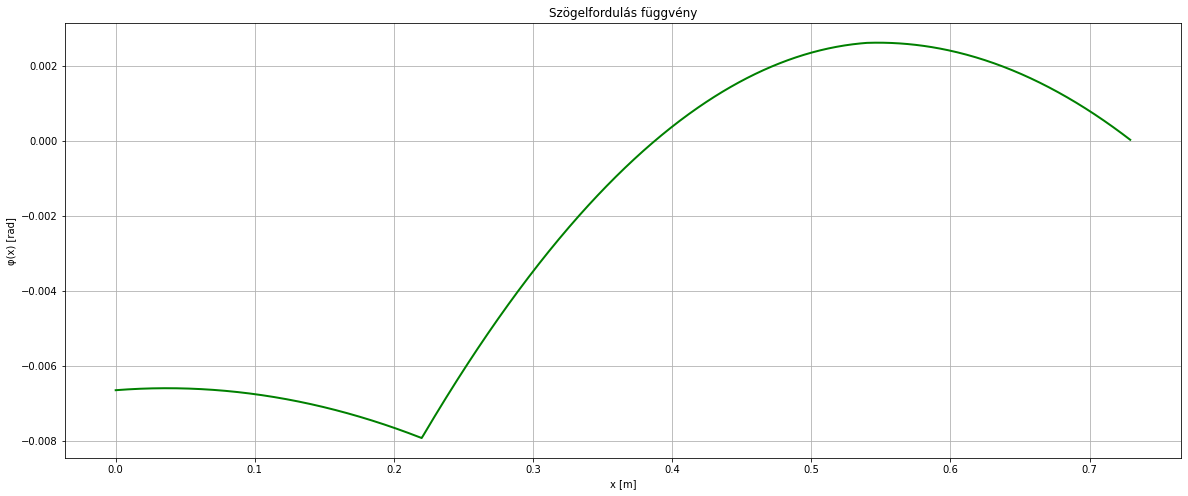

A szögelfordulás függvény értékei a nevezetes pontokban:

φ(0)= -0.00665379335864929 [rad]
φ(a)= -0.00792933049939869 [rad]
φ(b)= 0.00260471763206757 [rad]
φ(c)= -6.93889390390723e-18 [rad]


In [60]:
#Szogelfordulas fuggveny meghatarozasa

print("Szögelfordulás függvények alakjai:")

def φ(L_i,eDOF_i,x_i):
    return sp.diff(v_x(L_i,eDOF_i,x_i),x)

φ_1=sp.simplify(φ(L_1,eDOF1,0))
print("\nφ(x)_1=",φ_1)

φ_2=sp.simplify(φ(L_2,eDOF2,a))
print("φ(x)_2=",φ_2)

φ_3=sp.simplify(φ(L_3,eDOF3,b))
print("φ(x)_3=",φ_3)

#Plot

print("\nA szögelfordulás függvény ábrázolva:")

φ_g=sp.Piecewise((φ_1, a>x),(φ_2, b>x),(φ_3, c>x))
xs=np.linspace(0.,float(c),1000)

φ_xs=[φ_g.subs(x,xi) for xi in xs]

plt.figure(figsize=(20,8))
plt.plot(xs, φ_xs, lw=2, color='green')
plt.title("Szögelfordulás függvény")
plt.xlabel("x [m]")
plt.ylabel("φ(x) [rad]")
plt.grid()
plt.show()

print("A szögelfordulás függvény értékei a nevezetes pontokban:")

print("\nφ(0)=",φ_1.subs(x,0),"[rad]")
print("φ(a)=",φ_1.subs(x,a),"[rad]")
print("φ(b)=",φ_2.subs(x,b),"[rad]")
print("φ(c)=",φ_3.subs(x,c),"[rad]")

Hajlítónyomaték függvények alakjai:

Mh(x)_1= 330.000000000002*x - 12.1000000000003
Mh(x)_2= 3146.22211668213*x - 1745.16886567007
Mh(x)_3= 2626.22211668212*x - 1438.76886567006

A hajlítónyomaték függvény ábrázolva:


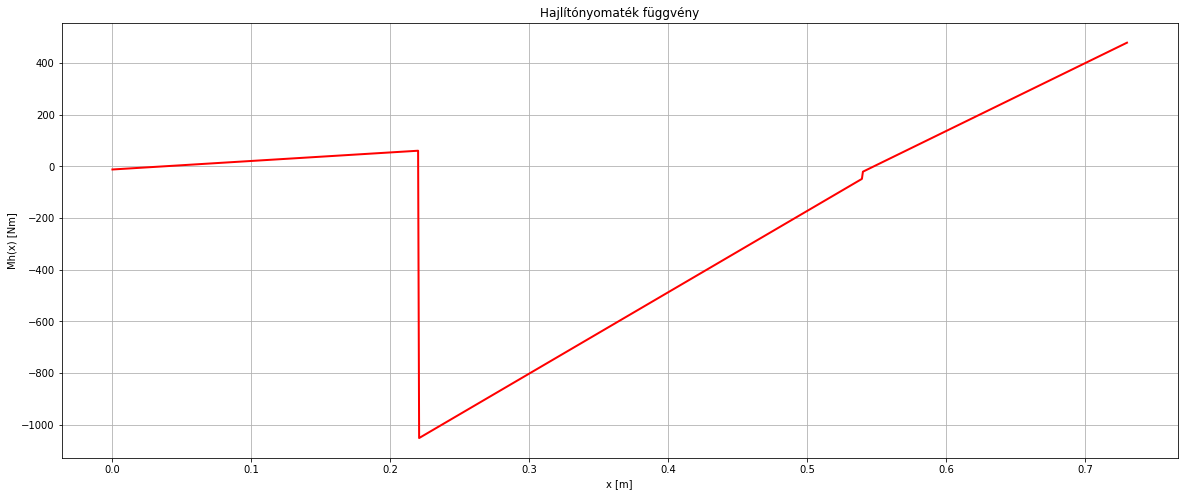

A hajlítónyomaték függvény értékei a nevezetes pontokban:

Mh(0)= -12.1000000000003 [Nm]
Mh_1(a)= 60.5000000000002 [Nm]
Mh_2(a)= -1053.00000000000 [Nm]
Mh_2(b)= -46.2089226617211 [Nm]
Mh_3(b)= -20.6089226617200 [Nm]
Mh(c)= 478.373279507882 [Nm]


In [64]:
#Hajlitonyomateki fuggveny meghatarozasa

print("Hajlítónyomaték függvények alakjai:")

def Mh(Iz_i,E_i,L_i,eDOF_i,x_i):
    return -Iz_i*E_i*sp.diff(φ(L_i,eDOF_i,x_i),x)

Mh_1=sp.simplify(Mh(Iz_1,E_1,L_1,eDOF1,0))
print("\nMh(x)_1=",Mh_1)

Mh_2=sp.simplify(Mh(Iz_2,E_2,L_2,eDOF2,a))
print("Mh(x)_2=",Mh_2)

Mh_3=sp.simplify(Mh(Iz_3,E_3,L_3,eDOF3,b))
print("Mh(x)_3=",Mh_3)

#Plot

print("\nA hajlítónyomaték függvény ábrázolva:")

Mh_g=sp.Piecewise((Mh_1, a>x),(Mh_2, b>=x),(Mh_3, c>=x))
xs=np.linspace(0.,float(c),1000)

Mh_xs=[Mh_g.subs(x,xi) for xi in xs]

plt.figure(figsize=(20,8))
plt.plot(xs, Mh_xs, lw=2, color='red')
plt.title("Hajlítónyomaték függvény")
plt.xlabel("x [m]")
plt.ylabel("Mh(x) [Nm]")
plt.grid()
plt.show()

print("A hajlítónyomaték függvény értékei a nevezetes pontokban:")

print("\nMh(0)=",Mh_1.subs(x,0),"[Nm]")
print("Mh_1(a)=",Mh_1.subs(x,a),"[Nm]")
print("Mh_2(a)=",Mh_2.subs(x,a),"[Nm]")
print("Mh_2(b)=",Mh_2.subs(x,b),"[Nm]")
print("Mh_3(b)=",Mh_3.subs(x,b),"[Nm]")
print("Mh(c)=",Mh_3.subs(x,c),"[Nm]")

In [95]:
#Analitikus modon

#Symbols

F_2y_an,F_4y_an,M_4_an=sp.symbols("F_2y_an,F_4y_an,M_4_an")
C_1,C_2,C_3,c_1,c_2,c_3=sp.symbols("C_1,C_2,C_3,c_1,c_2,c_3")

#Equations

eq_y=F_2y_an-F_1+F_4y_an-p_1*b
eq_M1=M_1-p_1*b**2/2+F_2y_an*a-F_1*b+F_4y_an*c+M_4_an
eq_M4=M_4_an+F_1*(c-b)+M_1-F_2y_an*(c-a)+p_1*b*(b/2+(c-b))

Mh_1_an=p_1/2*x**2
Mh_2_an=M_1-F_2y_an*(x-a)+p_1/2*x**2
Mh_3_an=M_1-F_2y_an*(x-a)+p_1*b*(x-b/2)+F_1*(x-b)

φ_1_an=-1/(Iz_1*E_1)*sp.integrate(Mh_1_an,x)+C_1
φ_2_an=-1/(Iz_2*E_2)*sp.integrate(Mh_2_an,x)+C_2
φ_3_an=-1/(Iz_3*E_3)*sp.integrate(Mh_3_an,x)+C_3

v_1_an=sp.integrate(φ_1_an,x)+c_1
v_2_an=sp.integrate(φ_2_an,x)+c_2
v_3_an=sp.integrate(φ_3_an,x)+c_3

#Peremfeltetelek

P1=sp.Eq(v_1_an.subs(x,a),0)
P2=sp.Eq(v_2_an.subs(x,a),0)
P3=sp.Eq(v_2_an.subs(x,b),v_3_an.subs(x,b))
P4=sp.Eq(v_3_an.subs(x,c),0)
P5=sp.Eq(φ_1_an.subs(x,a),φ_2_an.subs(x,a))
P6=sp.Eq(φ_2_an.subs(x,b),φ_3_an.subs(x,b))
P7=sp.Eq(φ_3_an.subs(x,c),0)

#Equation system

eq=sp.solve([eq_y,eq_M1,P1,P2,P3,P4,P5,P6,P7], (F_2y_an,F_4y_an,M_4_an,C_1,C_2,C_3,c_1,c_2,c_3))

print("Reakcióerők analitikus úton:")

F_2y_an=eq[F_2y_an]
print("\nF_2y_an=",F_2y_an,"[N]")

F_4y_an=eq[F_4y_an]
print("F_4y_an=",F_4y_an,"[N]")

M_4_an=eq[M_4_an]
print("M_4_an=",M_4_an,"[Nm]")

print("\nKonstansok értékei:")

c_1=eq[c_1]
print("\nc_1=",c_1)

c_2=eq[c_2]
print("c_2=",c_2)

c_3=eq[c_3]
print("c_3=",c_3)

C_1=eq[C_1]
print("\nC_1=",C_1)

C_2=eq[C_2]
print("C_2=",C_2)

C_3=eq[C_3]
print("C_3=",C_3)

Reakcióerők analitikus úton:

F_2y_an= -1593.74320585597 [N]
F_4y_an= -1026.25679414404 [N]
M_4_an= 122.390965013458 [Nm]

Konstansok értékei:

c_1= 0.000164853899841605
c_2= 0.000176412732997724
c_3= -0.00203210771188241

C_1= -0.00106822019355828
C_2= -0.00242165671513975
C_3= 0.0110268268163565


Az analitikus lehajás függvények alakjai

v_1_an(x)= 0.0299478104045219*x**4 - 0.00106822019355828*x + 0.000164853899841605
v_2_an(x)= 0.00748695260113048*x**4 - 0.0159097064541565*x**3 + 0.0105004062597433*x**2 - 0.00242165671513975*x + 0.000176412732997724
v_3_an(x)= 0.0102447146324593*x**3 - 0.0187705836296365*x**2 + 0.0110268268163565*x - 0.00203210771188241

Az analitikus lehajlás függvény ábrázolva:


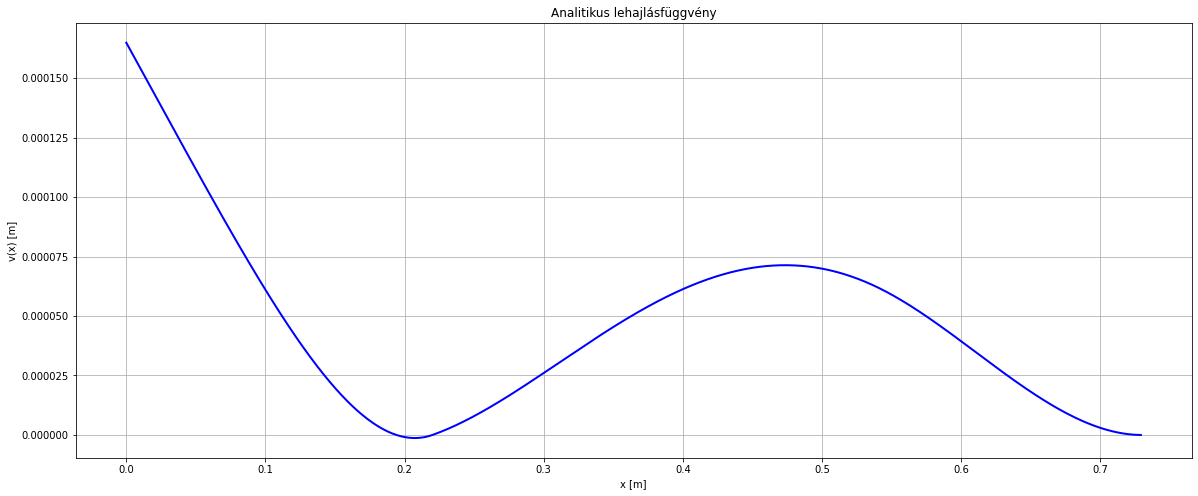

Az analitikus lehajlásfüggvény értékei a nevezetes pontokban:

v(0)_an= 0.000164853899841605 [m]
v(a)_an= -8.13151629364128e-20 [m]
v(b)_an= 6.20503274336849e-5 [m]
v(c)_an= -3.46944695195361e-18 [m]


In [100]:
#Analitikus lehajlas fuggveny

print("Az analitikus lehajás függvények alakjai")

#Visszahelyettesites

v_1_an=v_1_an.subs(eq)
print("\nv_1_an(x)=",v_1_an)

v_2_an=v_2_an.subs(eq)
print("v_2_an(x)=",v_2_an)

v_3_an=v_3_an.subs(eq)
print("v_3_an(x)=",v_3_an)

#Plot

print("\nAz analitikus lehajlás függvény ábrázolva:")

v_an=sp.Piecewise((v_1_an, a>x),(v_2_an, b>x),(v_3_an, c>x))
xs=np.linspace(0.,float(c),1000)

v_an_xs=[v_an.subs(x,xi) for xi in xs]

plt.figure(figsize=(20,8))
plt.plot(xs, v_an_xs, lw=2, color='blue')
plt.title("Analitikus lehajlásfüggvény")
plt.xlabel("x [m]")
plt.ylabel("v(x) [m]")
plt.grid()
plt.show()

print("Az analitikus lehajlásfüggvény értékei a nevezetes pontokban:")

print("\nv(0)_an=",v_1_an.subs(x,0),"[m]")
print("v(a)_an=",v_1_an.subs(x,a),"[m]")
print("v(b)_an=",v_2_an.subs(x,b),"[m]")
print("v(c)_an=",v_3_an.subs(x,c),"[m]")